In [174]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os

In [175]:
os.listdir('chest_xray/train/')

['NORMAL', 'PNEUMONIA']

In [176]:
os.listdir('chest_xray/train/PNEUMONIA/')

['BACTERIA-1008087-0001.jpeg',
 'BACTERIA-1025587-0001.jpeg',
 'BACTERIA-1027194-0001.jpeg',
 'BACTERIA-1033441-0001.jpeg',
 'BACTERIA-103798-0001.jpeg',
 'BACTERIA-103798-0002.jpeg',
 'BACTERIA-1039608-0001.jpeg',
 'BACTERIA-1040986-0001.jpeg',
 'BACTERIA-1041881-0001.jpeg',
 'BACTERIA-1041881-0002.jpeg',
 'BACTERIA-104960-0001.jpeg',
 'BACTERIA-1065620-0001.jpeg',
 'BACTERIA-1065620-0002.jpeg',
 'BACTERIA-1069837-0001.jpeg',
 'BACTERIA-1069837-0002.jpeg',
 'BACTERIA-1074715-0001.jpeg',
 'BACTERIA-1076722-0001.jpeg',
 'BACTERIA-1083680-0001.jpeg',
 'BACTERIA-1083680-0002.jpeg',
 'BACTERIA-1083680-0003.jpeg',
 'BACTERIA-1083680-0004.jpeg',
 'BACTERIA-1083680-0005.jpeg',
 'BACTERIA-1083680-0006.jpeg',
 'BACTERIA-1083680-0007.jpeg',
 'BACTERIA-1083680-0008.jpeg',
 'BACTERIA-1083680-0009.jpeg',
 'BACTERIA-1083680-0010.jpeg',
 'BACTERIA-1083680-0011.jpeg',
 'BACTERIA-1083680-0012.jpeg',
 'BACTERIA-1083680-0013.jpeg',
 'BACTERIA-1083680-0014.jpeg',
 'BACTERIA-1083680-0015.jpeg',
 'BACTERIA-

In [177]:
test_image = mpimg.imread(('chest_xray/train/PNEUMONIA/BACTERIA-1076722-0001.jpeg'))

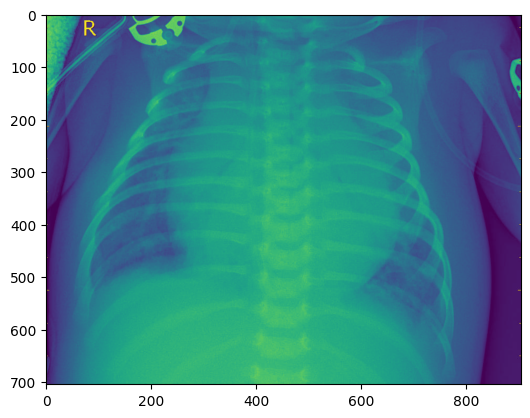

In [178]:
plt.imshow(test_image)

In [179]:
test_image

array([[198, 192, 187, ...,  19,  18,  17],
       [200, 196, 194, ...,  19,  18,  17],
       [202, 202, 202, ...,  18,  17,  16],
       ...,
       [ 30,  28,  25, ...,  18,  18,  18],
       [ 31,  29,  26, ...,  18,  18,  18],
       [ 32,  30,  27, ...,  18,  18,  18]], shape=(704, 904), dtype=uint8)

In [180]:
test_image.shape

(704, 904)

In [181]:
X = []
y = []
for i in os.listdir('chest_xray/train/'):
    for j in os.listdir(f'chest_xray/train/{i}'):
        try:
            image = mpimg.imread(f'chest_xray/train/{i}/{j}')
        except:
            continue
        if len(image.shape) == 3:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = image / 255
        image = cv2.resize(image, (224, 224)) 
        image = image.reshape(224, 224, 1)
        X.append(image)
        y.append(i)
X = np.array(X)
y = np.array(y)

In [182]:
X

array([[[[3.56388180e-01],
         [3.73080170e-01],
         [3.87408401e-01],
         ...,
         [6.10310374e-01],
         [6.72759104e-01],
         [5.78987845e-01]],

        [[3.72549020e-01],
         [3.54569640e-01],
         [3.88159951e-01],
         ...,
         [6.61220426e-01],
         [6.17610794e-01],
         [3.15400223e-01]],

        [[3.58206720e-01],
         [3.70273109e-01],
         [3.61525235e-01],
         ...,
         [6.56853054e-01],
         [3.74429147e-01],
         [3.54010354e-01]],

        ...,

        [[0.00000000e+00],
         [3.79839436e-04],
         [0.00000000e+00],
         ...,
         [0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00]],

        [[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00]],

        [[1.05042017e-04],
         [0.00000000e+00],
         [3.81652661e-03],
         ...,
 

In [183]:
y

array(['NORMAL', 'NORMAL', 'NORMAL', ..., 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA'], shape=(5232,), dtype='<U9')

In [184]:
X.shape

(5232, 224, 224, 1)

In [185]:
y.shape

(5232,)

In [186]:
from sklearn.preprocessing import LabelEncoder

In [187]:
label = LabelEncoder()

In [188]:
y = label.fit_transform(y)

In [189]:
from keras.utils import to_categorical

In [190]:
y = to_categorical(y, num_classes=2)

In [191]:
from sklearn.model_selection import train_test_split

In [192]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=43)

In [193]:
X_train.shape

(4185, 224, 224, 1)

In [194]:
X_val.shape

(1047, 224, 224, 1)

In [195]:
y_train.shape

(4185, 2)

In [196]:
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy

In [197]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

C:\Users\User\OneDrive\Desktop\ml\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [198]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss=CategoricalCrossentropy(from_logits=False) , metrics=['accuracy'])

In [199]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=7, batch_size=64)

Epoch 1/7
66/66 ━━━━━━━━━━━━━━━━━━━━ 462s 6s/step - accuracy: 0.7959 - loss: 0.4682 - val_accuracy: 0.9379 - val_loss: 0.1624
Epoch 2/7
66/66 ━━━━━━━━━━━━━━━━━━━━ 377s 6s/step - accuracy: 0.9508 - loss: 0.1301 - val_accuracy: 0.9580 - val_loss: 0.1008
Epoch 3/7
66/66 ━━━━━━━━━━━━━━━━━━━━ 382s 6s/step - accuracy: 0.9596 - loss: 0.0998 - val_accuracy: 0.9666 - val_loss: 0.0932
Epoch 4/7
66/66 ━━━━━━━━━━━━━━━━━━━━ 381s 6s/step - accuracy: 0.9708 - loss: 0.0741 - val_accuracy: 0.9589 - val_loss: 0.1090
Epoch 5/7
66/66 ━━━━━━━━━━━━━━━━━━━━ 379s 6s/step - accuracy: 0.9780 - loss: 0.0636 - val_accuracy: 0.9771 - val_loss: 0.0726
Epoch 6/7
66/66 ━━━━━━━━━━━━━━━━━━━━ 386s 6s/step - accuracy: 0.9795 - loss: 0.0529 - val_accuracy: 0.9771 - val_loss: 0.0694
Epoch 7/7
66/66 ━━━━━━━━━━━━━━━━━━━━ 382s 6s/step - accuracy: 0.9840 - loss: 0.0436 - val_accuracy: 0.9790 - val_loss: 0.0677


Text(0.5, 1.0, 'accuracy')

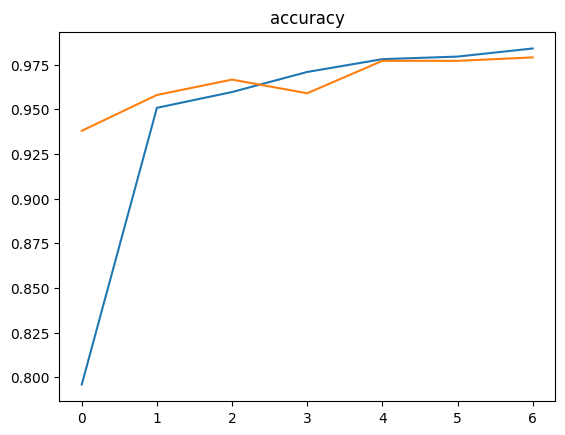

In [200]:
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.title('accuracy')

Text(0.5, 1.0, 'Loss')

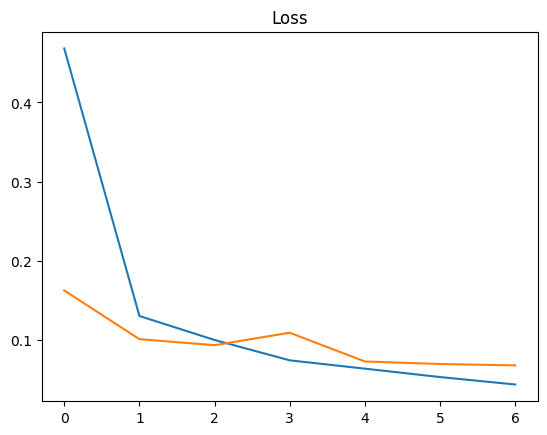

In [201]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.title('Loss')

In [202]:
os.listdir('chest_xray/test/NORMAL/')

['NORMAL-1049278-0001.jpeg',
 'NORMAL-1110860-0001.jpeg',
 'NORMAL-11419-0001.jpeg',
 'NORMAL-115218-0001.jpeg',
 'NORMAL-1160949-0001.jpeg',
 'NORMAL-1212407-0001.jpeg',
 'NORMAL-1228182-0001.jpeg',
 'NORMAL-1283091-0001.jpeg',
 'NORMAL-1318320-0001.jpeg',
 'NORMAL-1368583-0001.jpeg',
 'NORMAL-1430636-0001.jpeg',
 'NORMAL-1520670-0001.jpeg',
 'NORMAL-152130-0001.jpeg',
 'NORMAL-159472-0001.jpeg',
 'NORMAL-1608079-0001.jpeg',
 'NORMAL-1627110-0001.jpeg',
 'NORMAL-1698651-0001.jpeg',
 'NORMAL-171327-0001.jpeg',
 'NORMAL-1759114-0001.jpeg',
 'NORMAL-1763721-0001.jpeg',
 'NORMAL-1768815-0001.jpeg',
 'NORMAL-1771524-0001.jpeg',
 'NORMAL-1784004-0001.jpeg',
 'NORMAL-1803887-0001.jpeg',
 'NORMAL-1858497-0001.jpeg',
 'NORMAL-186900-0001.jpeg',
 'NORMAL-1931427-0001.jpeg',
 'NORMAL-1944537-0001.jpeg',
 'NORMAL-2107985-0001.jpeg',
 'NORMAL-2123652-0001.jpeg',
 'NORMAL-2162145-0001.jpeg',
 'NORMAL-217318-0001.jpeg',
 'NORMAL-2233350-0001.jpeg',
 'NORMAL-2256620-0001.jpeg',
 'NORMAL-2274324-0001.

In [222]:
test_image = mpimg.imread('chest_xray/test/NORMAL/NORMAL-3065672-0001.jpeg')

In [223]:
if len(test_image.shape) == 3:
            test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

In [224]:
test_image = cv2.resize(test_image, (224,224))

In [225]:
test_image = test_image.reshape(1, 224, 224, 1)

In [226]:
label.classes_

array(['NORMAL', 'PNEUMONIA'], dtype='<U9')

In [227]:
labels = ['NORMAL', 'PNEUMONIA']

In [228]:
y_pred = model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


In [229]:
xray = labels[np.argmax(y_pred)]

In [230]:
xray

'NORMAL'